#### NYC Weather Data Cleaning & Exploration

In [1]:
# Import Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.dpi"] = 300
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

In [2]:
# Load the datasets 

weather_description = pd.read_csv('weather_description.csv')
temperature = pd.read_csv('temperature.csv')
humidity = pd.read_csv('humidity.csv')
pressure = pd.read_csv('pressure.csv')
wind_speed = pd.read_csv('wind_speed.csv')
wind_direction = pd.read_csv('wind_direction.csv')

In [3]:
# Only the weather data of the New York city is considered

weather_description = weather_description.filter(items=['datetime','New York'])
temperature = temperature.filter(items=['datetime','New York']) 
humidity = humidity.filter(items=['datetime','New York']) 
pressure = pressure.filter(items=['datetime','New York'])
wind_speed = wind_speed.filter(items=['datetime','New York'])
wind_direction = wind_direction.filter(items=['datetime','New York'])

In [4]:
# Merge the datasets into a single dataframe

nyc_weather = (weather_description.merge(temperature, on='datetime').
               merge(humidity, on='datetime').
               merge(pressure, on='datetime').
               merge(wind_speed, on='datetime').
               merge(wind_direction, on='datetime')
              )
nyc_weather.columns = ['DateTime', 'Description', 'Temperature', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection']
nyc_weather.head()

,DateTime,Description,Temperature,Humidity,Pressure,WindSpeed,WindDirection
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,few clouds,288.220000,58.0,1012.0,7.0,260.0
2,2012-10-01 14:00:00,few clouds,288.247676,57.0,1012.0,7.0,260.0
3,2012-10-01 15:00:00,few clouds,288.326940,57.0,1012.0,7.0,260.0
4,2012-10-01 16:00:00,few clouds,288.406203,57.0,1012.0,7.0,260.0


In [5]:
# Convert the temperature from Kelvin to Celcius

nyc_weather['Temperature'] = nyc_weather['Temperature'] - 273 
nyc_weather.head()

,DateTime,Description,Temperature,Humidity,Pressure,WindSpeed,WindDirection
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,few clouds,15.220000,58.0,1012.0,7.0,260.0
2,2012-10-01 14:00:00,few clouds,15.247676,57.0,1012.0,7.0,260.0
3,2012-10-01 15:00:00,few clouds,15.326940,57.0,1012.0,7.0,260.0
4,2012-10-01 16:00:00,few clouds,15.406203,57.0,1012.0,7.0,260.0


In [6]:
# Remove the duplicate rows (if any)

nyc_weather.drop_duplicates(inplace=True)

In [7]:
# Data Types & Missing Values
# Data has columns with incorrect format and missing values that needs to be addressed

nyc_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DateTime       45253 non-null  object 
 1   Description    44460 non-null  object 
 2   Temperature    44460 non-null  float64
 3   Humidity       43629 non-null  float64
 4   Pressure       44212 non-null  float64
 5   WindSpeed      44460 non-null  float64
 6   WindDirection  44460 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [8]:
# Reformat the "DateTime" column from object format to datetime format
# Sort the data by "DateTime"

nyc_weather['DateTime'] = pd.to_datetime(nyc_weather['DateTime'])
nyc_weather = nyc_weather.sort_values(by="DateTime")

In [9]:
# Only the dates April 2014 to September 2014 and January to June 2015 are considered 
# Filter the data by "DateTime" to choose the considered date range

nyc_weather = nyc_weather[((nyc_weather.DateTime >= '2014-04-01') & (nyc_weather.DateTime <= '2014-09-30')) | 
                          ((nyc_weather.DateTime >= '2015-01-01') & (nyc_weather.DateTime <= '2015-06-30'))]

nyc_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8690 entries, 13116 to 24036
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       8690 non-null   datetime64[ns]
 1   Description    8690 non-null   object        
 2   Temperature    8690 non-null   float64       
 3   Humidity       8652 non-null   float64       
 4   Pressure       8690 non-null   float64       
 5   WindSpeed      8690 non-null   float64       
 6   WindDirection  8690 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 543.1+ KB


In [10]:
# There are no missing values in the considered data range except from the 
# "Humidity" column which has 38 rows of missing data

nyc_weather.isnull().sum()

DateTime          0
Description       0
Temperature       0
Humidity         38
Pressure          0
WindSpeed         0
WindDirection     0
dtype: int64

In [11]:
# Occurence of unique weather conditions
# There is a grouping required across the unique weather conditions to ensure reasonable & optimal values

nyc_weather.Description.value_counts()

sky is clear                        2135
broken clouds                       1352
scattered clouds                    1136
light rain                           989
few clouds                           774
overcast clouds                      715
mist                                 713
moderate rain                        289
haze                                 109
light snow                           105
heavy intensity rain                 101
fog                                   93
snow                                  52
light intensity drizzle               37
dust                                  19
thunderstorm                          18
proximity thunderstorm                18
very heavy rain                        8
drizzle                                7
thunderstorm with light rain           6
thunderstorm with heavy rain           5
smoke                                  3
heavy intensity drizzle                2
thunderstorm with rain                 2
proximity thunde

In [12]:
# Group the weather conditions

label_dict = {'zero': 0,
              'sky is clear': 'clear sky',
              'broken clouds': 'cloudy',
              'scattered clouds': 'cloudy',
              'light rain': 'light rain',
              'few clouds': 'cloudy',
              'overcast clouds' : 'overcast',
              'mist': 'mist',
              'moderate rain': 'moderate rain',                        
              'haze': 'haze',                                 
              'light snow': 'snow',                          
              'heavy intensity rain': 'heavy rain',                 
              'fog': 'fog',                                   
              'snow': 'snow',                                  
              'light intensity drizzle': 'light rain',               
              'dust': 'dust',                                  
              'proximity thunderstorm': 'thunderstorm',                
              'thunderstorm': 'thunderstorm',                          
              'very heavy rain': 'heavy rain',                        
              'drizzle': 'light rain',                               
              'thunderstorm with light rain': 'light rain',           
              'thunderstorm with heavy rain': 'heavy rain',           
              'smoke': 'dust',                                  
              'thunderstorm with rain': 'moderate rain',                 
              'proximity thunderstorm with rain': 'moderate rain',      
              'heavy intensity drizzle': 'light rain'                
             }

nyc_weather['Description'] = nyc_weather['Description'].apply( lambda i : label_dict[i])

In [13]:
# Weather conditions after grouping

nyc_weather.Description.value_counts()

cloudy           3262
clear sky        2135
light rain       1041
overcast          715
mist              713
moderate rain     293
snow              157
heavy rain        114
haze              109
fog                93
thunderstorm       36
dust               22
Name: Description, dtype: int64

In [14]:
# Get the base statistics of the data

nyc_weather.describe()

,Temperature,Humidity,Pressure,WindSpeed,WindDirection
count,8690.000000,8652.000000,8690.000000,8690.000000,8690.000000
mean,12.949933,68.069348,1019.236824,2.637975,202.824051
std,11.320411,19.122014,9.105743,1.774199,101.215391
min,-22.226000,10.000000,968.000000,0.000000,0.000000
25%,4.880500,54.000000,1013.000000,1.000000,132.000000
50%,15.877000,69.000000,1019.000000,2.000000,214.000000
75%,21.570000,83.000000,1024.000000,4.000000,290.000000
max,33.820000,100.000000,1052.000000,13.000000,360.000000


In [15]:
# Extract the datetime features

# nyc_weather['Date'] = nyc_weather['DateTime'].dt.date
# nyc_weather['Year'] = nyc_weather['DateTime'].dt.year
# nyc_weather['Month'] = nyc_weather['DateTime'].dt.month
# nyc_weather['Day'] = nyc_weather['DateTime'].dt.day
# nyc_weather['Weekday'] = nyc_weather['DateTime'].dt.day_name()
# nyc_weather['Hour'] = nyc_weather['DateTime'].dt.hour

In [16]:
nyc_weather.head()

,DateTime,Description,Temperature,Humidity,Pressure,WindSpeed,WindDirection
13116,2014-04-01 00:00:00,cloudy,9.96,40.0,1016.0,5.0,330.0
13117,2014-04-01 01:00:00,cloudy,8.83,NaN,1016.0,5.0,340.0
13118,2014-04-01 02:00:00,cloudy,6.84,NaN,1017.0,7.0,360.0
13119,2014-04-01 03:00:00,cloudy,5.07,60.0,1018.0,6.0,20.0
13120,2014-04-01 04:00:00,clear sky,4.19,60.0,1019.0,4.0,360.0


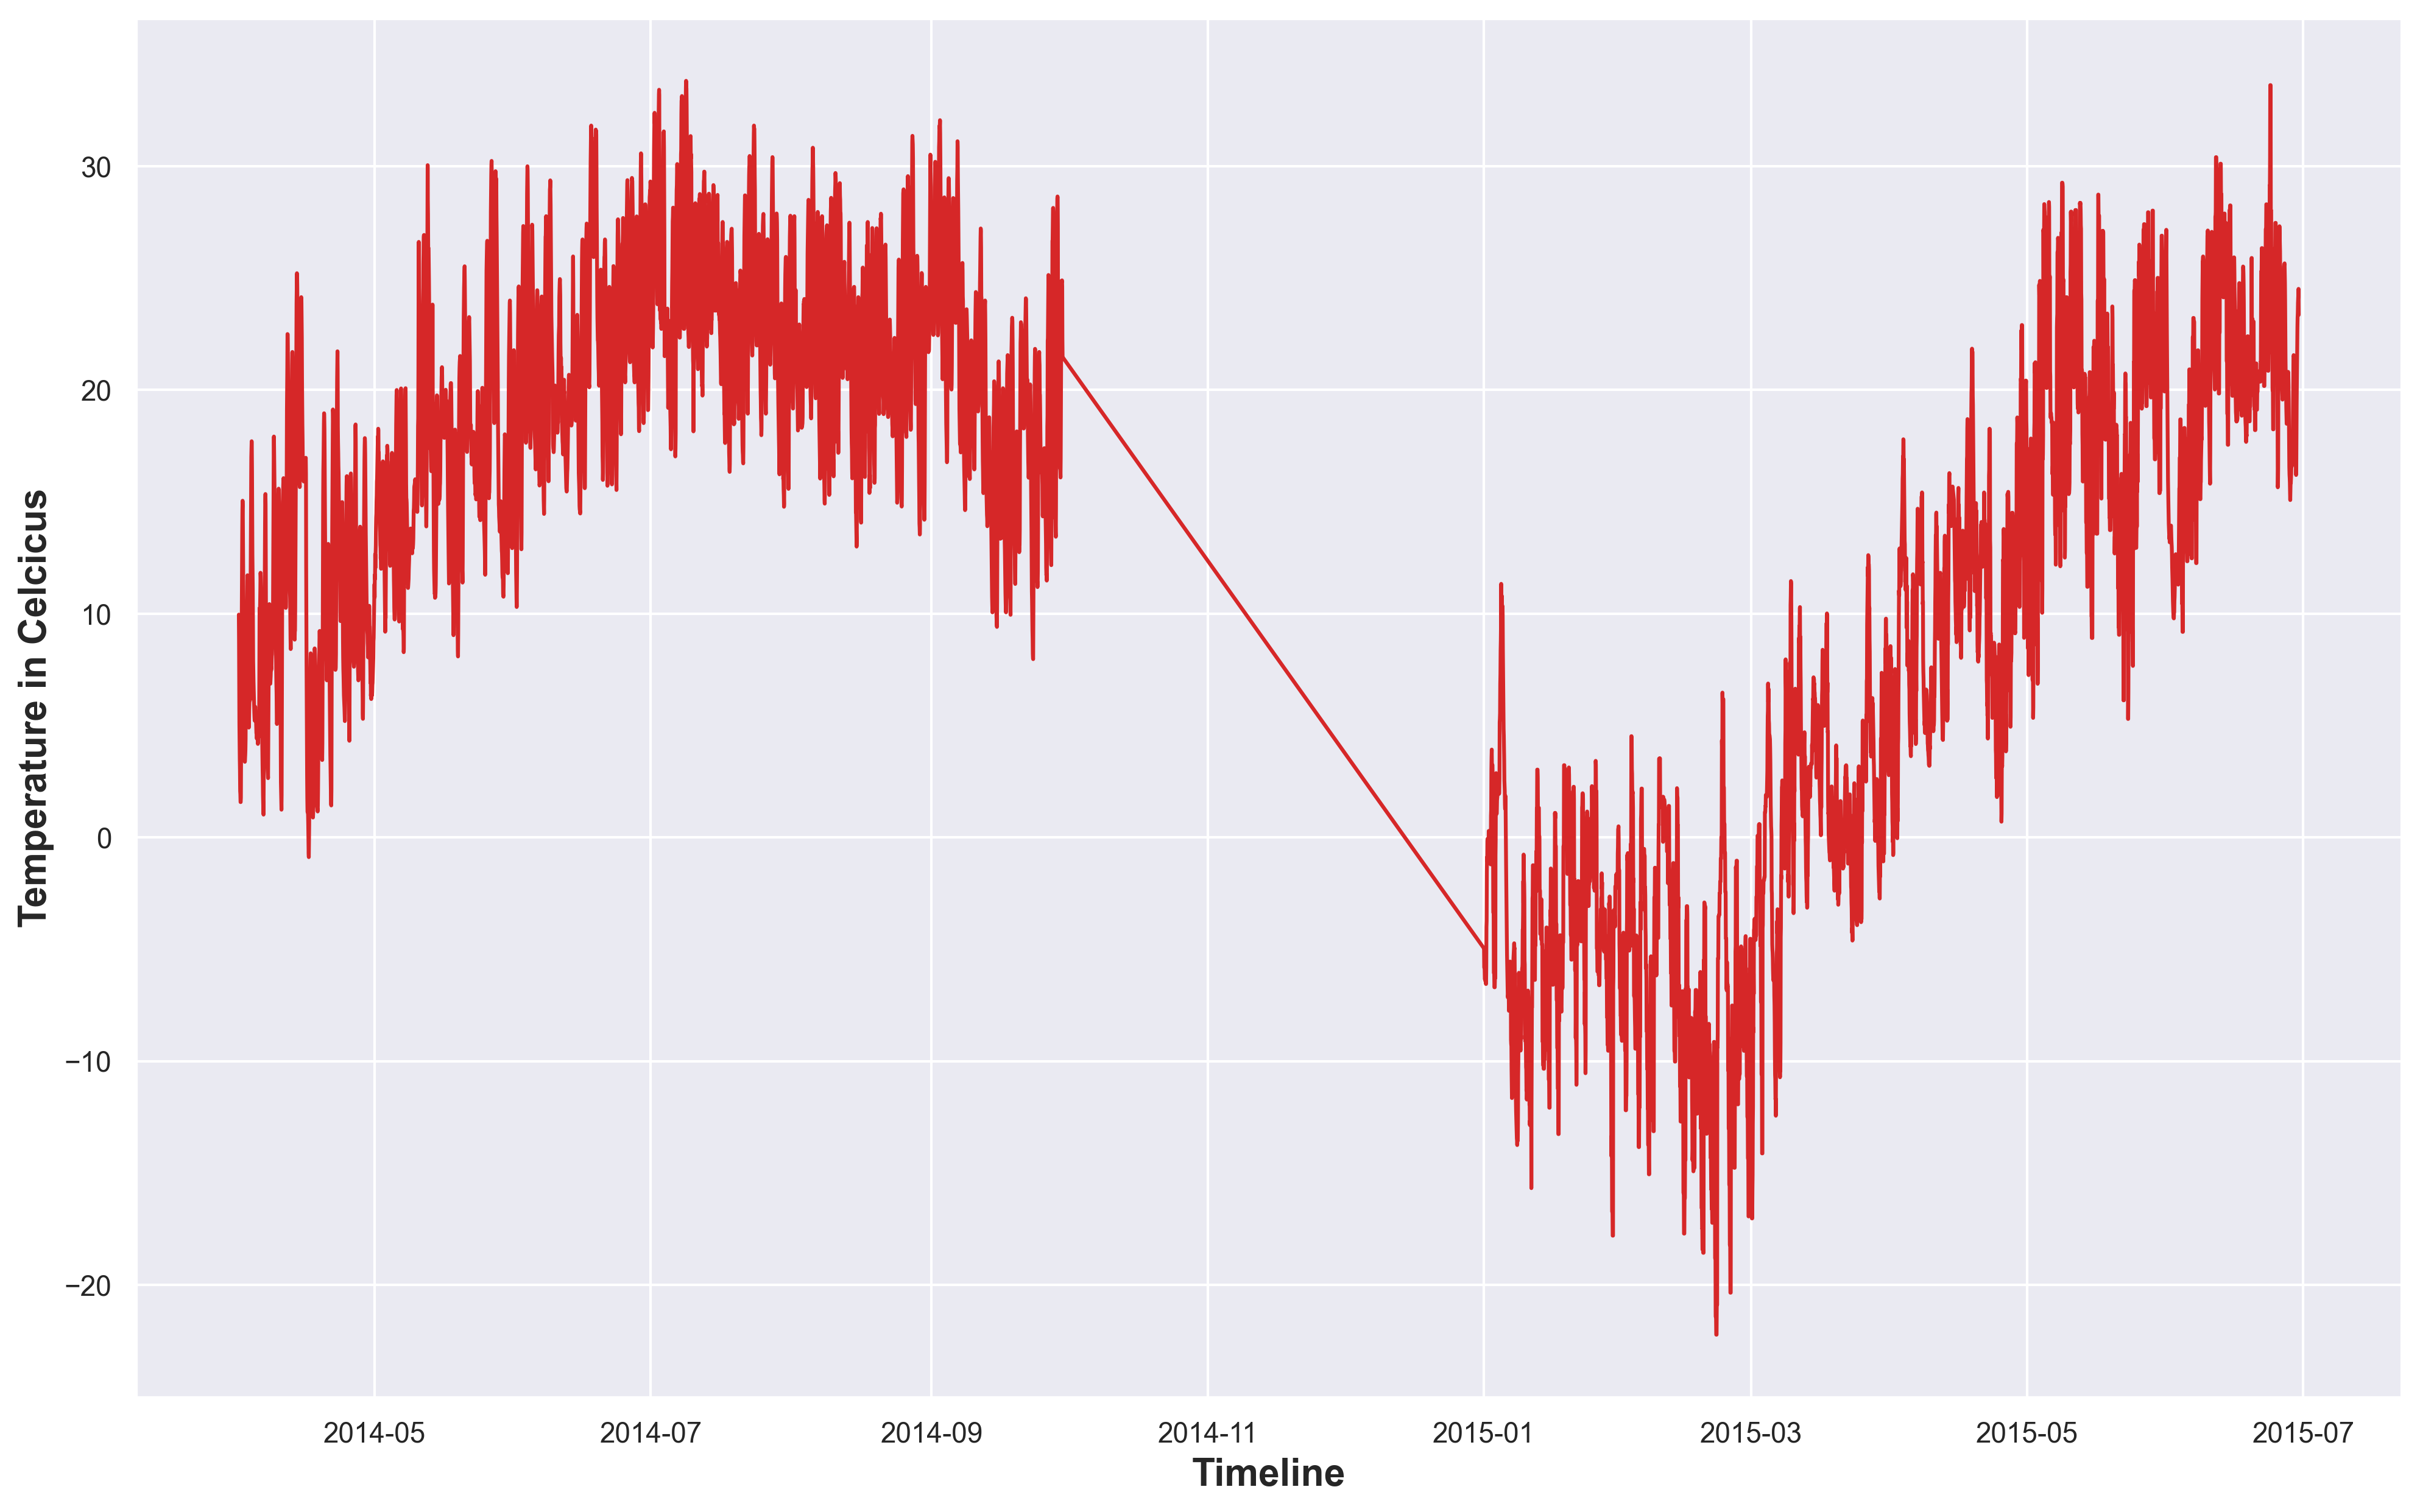

In [17]:
# Generate a timeseries plot of to understand the trends in temperature across the timeline

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.dpi"] = 300
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(nyc_weather.DateTime, nyc_weather.Temperature, color='tab:red')
ax.set_xlabel('Timeline', fontsize = 15, fontweight ='bold')
ax.set_ylabel('Temperature in Celcicus', fontsize = 15, fontweight ='bold')
ax.grid(True)
plt.savefig('plot1.png', dpi=300)

In [18]:
# Save the "weather data" as CSV for associating with "hourly distribution of the daily Rides at each base"
# to perfrom further analysis and modeling

# nyc_weather.to_csv('nyc_weather.csv', encoding='utf-8', index=False)